<a href="https://colab.research.google.com/github/yolandaeka/DataMining_2024/blob/main/kmeans1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels:  [0 0 0 1 1 1]
Centroids:  [[1. 2.]
 [4. 2.]]


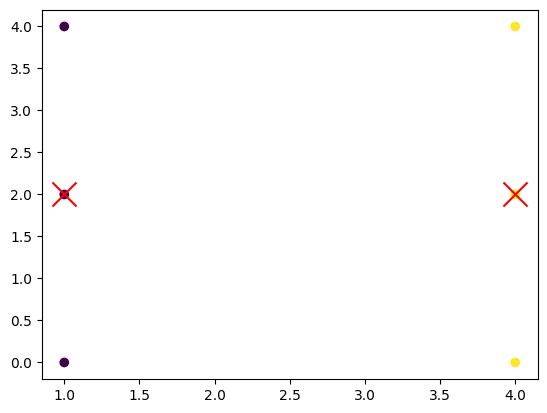

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


# membuat data dummy
x = np.array([[1,2],[1,4],[1,0],
              [4,2],[4,4],[4,0]])

# membuat model kmeans dengan jumlah kluster 2
kmeans = KMeans(n_clusters=2, random_state=0)

# melatih model
kmeans.fit(x)

# melihat hasil kluster masing masing
labels = kmeans.labels_
print("Labels: ",labels)

# melihat centorid
centroids = kmeans.cluster_centers_
print("Centroids: ", centroids)

#plotting hasil klustering
plt.scatter(x[:,0], x[:,1], c = labels, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], s = 300, c = 'red', marker = 'x')
plt.show()